In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
catalog_full = pd.read_pickle('/data/scratch/dc2local/dc2_lensing_catalog.pkl')

In [3]:
# we filter to the two tracts for which we have coadded images
catalog = catalog_full[catalog_full['tract'].isin([3828, 3829])]
catalog.rename(columns = {'mag_r': 'r-band mag',
                          'shear_1': r'$\gamma_1$',
                          'shear_2': r'$\gamma_2$',
                          'convergence': r'$\kappa$'}, inplace = True)

/tmp/ipykernel_342145/597925906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog.rename(columns = {'mag_r': 'r-band mag',


In [4]:
catalog_subset = catalog.sample(n=100000, random_state=42)

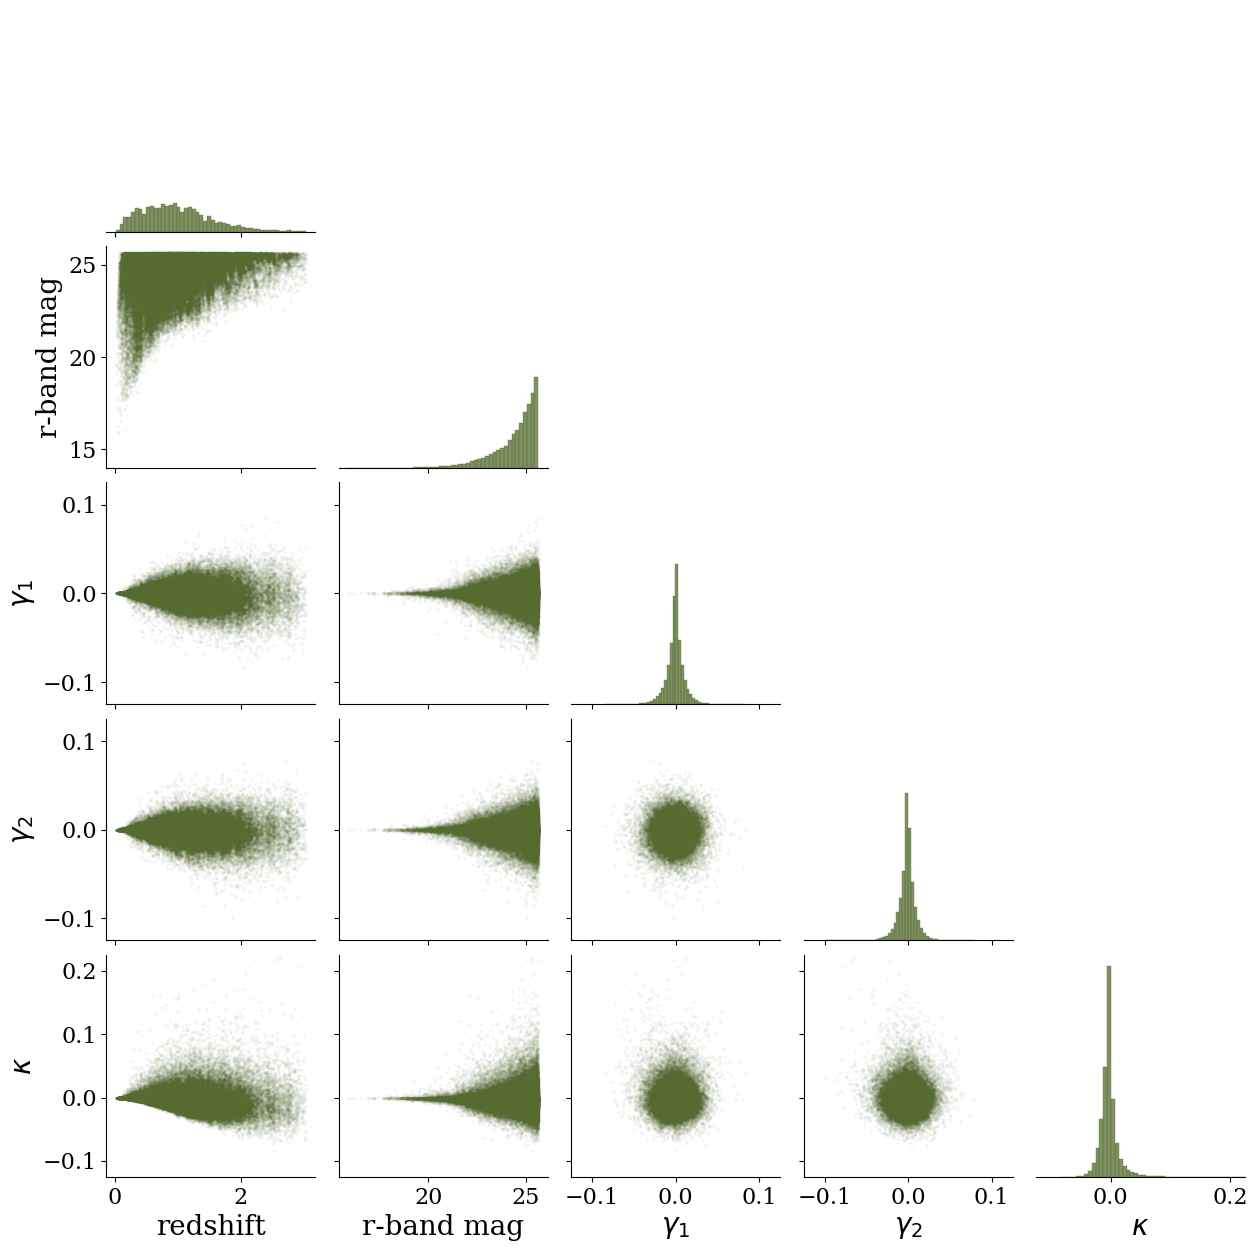

In [5]:
color = 'darkolivegreen'
alpha = 0.05
s = 5
bins = 50
fontsize = 20
ticklabelsize = 16

fig = sns.pairplot(catalog_subset[['redshift', 'r-band mag', r'$\gamma_1$', r'$\gamma_2$', r'$\kappa$']],
                   corner = True,
                   plot_kws={'color': color, 'edgecolor': color, 'alpha': alpha, 's': s},
                   diag_kws={'color': color, 'edgecolor': color, 'bins': bins})

for ax in fig.axes.flat:
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize = fontsize)
        ax.set_ylabel(ax.get_ylabel(), fontsize = fontsize)
        ax.tick_params(axis='both', which='major', labelsize=ticklabelsize)

fig.axes[1,0].set_ylim(14, 26)
fig.axes[2,0].set_ylim(-0.125, 0.125)
fig.axes[3,0].set_ylim(-0.125, 0.125)
fig.axes[4,0].set_ylim(-0.125, 0.225)
fig.axes[4,2].set_xlim(-0.125, 0.125)
fig.axes[4,3].set_xlim(-0.125, 0.125)
fig.axes[4,4].set_xlim(-0.125, 0.225)

fig.savefig("figures/dc2galaxyproperties.png", dpi = 300, transparent = True, bbox_inches = 'tight', pad_inches = 0)